In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

In [2]:
SAVE_FIGURES = True
xlabel = 'Log($g_{base}$) [$ms^{-2}$]'

In [3]:
standard = Result(load_sparc(namespace='baseline/201_21'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


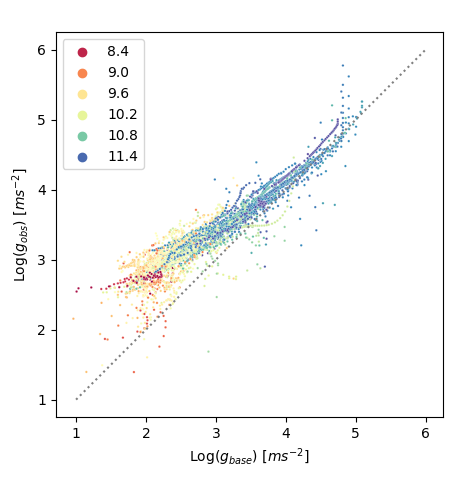

In [4]:
g = standard.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/baseline_rar.eps')

In [5]:
for key, data in standard.datasets().items():
    print(key, len(data), len(data.groupby('Galaxy')))

Everything 3327 169
Quality data 2096 97
Quality simulation 1596 97


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


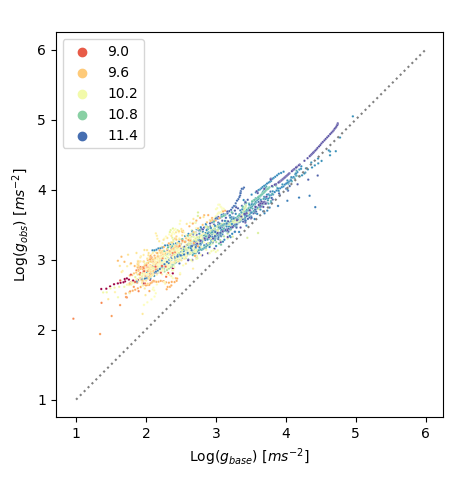

In [20]:
g = standard.plot_rar(kind=0, title=' ', query_key='Quality simulation', label=xlabel)
if SAVE_FIGURES: g.savefig('../figures/baseline_rar_quality.eps')

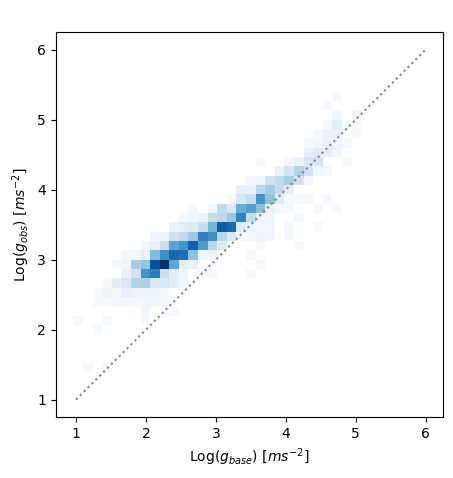

In [13]:
g = standard.plot_rar(kind=3, title=' ', query_key='Quality data', label=xlabel)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


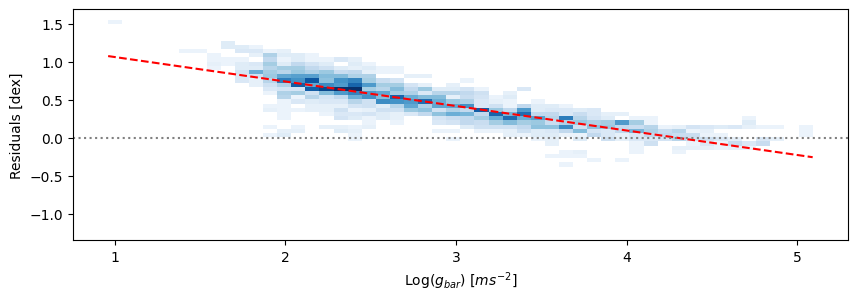

In [8]:
g = standard.residual(xlabel=xlabel)
if SAVE_FIGURES: g.savefig('../figures/baseline_residual_g.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


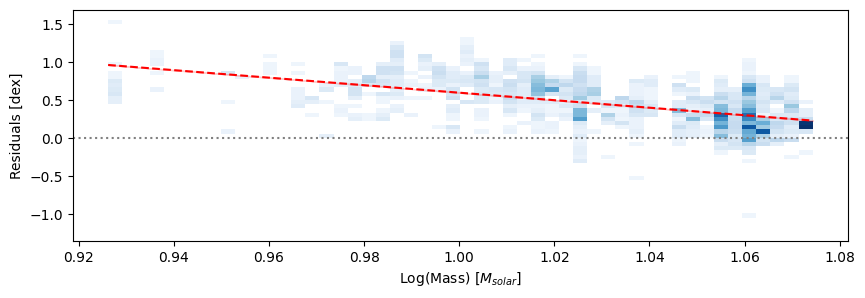

In [9]:
standard.residual(resid='log_M', xlabel='Log(Mass) [$M_{solar}$]')
if SAVE_FIGURES: g.savefig('../figures/baseline_residual_m.eps')

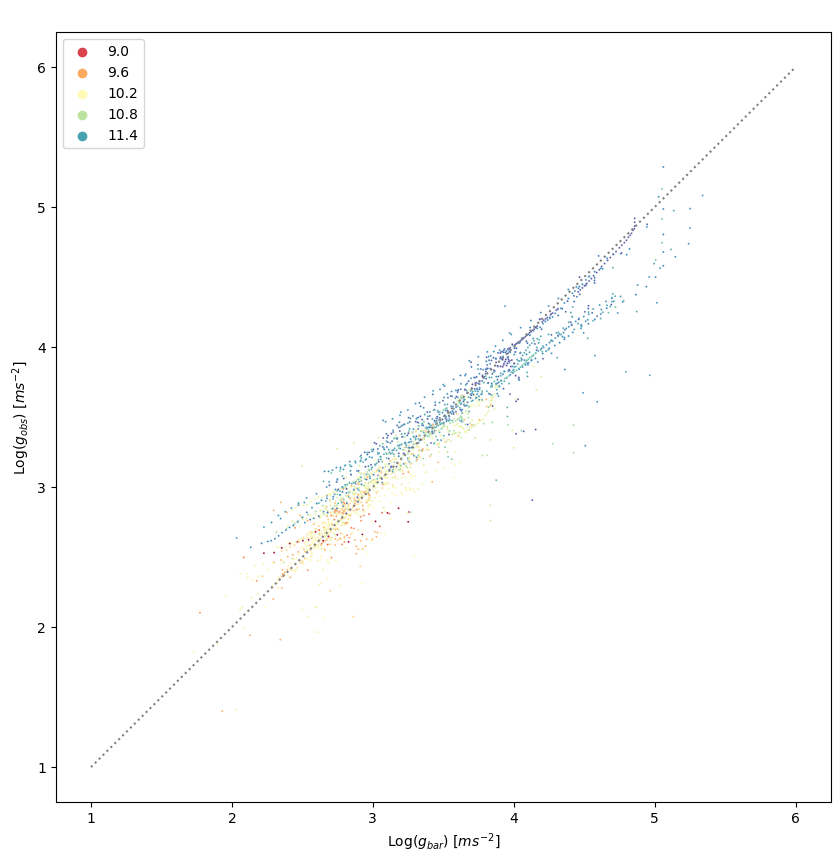

In [14]:
analysis = Tune(mcmc(standard.datasets()['Quality data'], train_d=False, tight={'Inc': 0.01, 'Ymass': 0.01}))
tuned = analysis.Result(True, simulations=standard.simulations)
g = tuned.plot_rar(kind=0, title=' ', query_key='Everything', label=xlabel)